# Ordinary Least Squares [vif5]
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

linear_model.LinearRegression()

{'copy_X': True,   
 'fit_intercept': True,    
 'n_jobs': None,   
 'normalize': 'deprecated',    
 'positive': False}
 
 **_no hyperparameter tuning_**

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import platform
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize, space
import sys

from validation import cross_validation
from validation import performance_test_shifted

date_format = '%Y-%m-%d'

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
# config 'all', 'vif_5' or 'vif_10'
vif = 'vif_5'

# config model
ml_algorithm = linear_model.LinearRegression
filename = 'single-model_tau_ols'

In [3]:
my_os = platform.system()
print('OS in my system: ',my_os)

if my_os == 'Windows':
    path = str(pathlib.Path().absolute()) + '\\'
    slash = '\\'
else:
    path = str(pathlib.Path().absolute()) + '/'
    slash = '/'

path_3 = path.replace('4_modelling', '3_data_pre-processing')

OS in my system:  Linux


## Load Data

In [4]:
data_set = pd.read_csv(path_3 + 'data_artifacts' + slash + 'data_set_e_spx_3-' + vif + '.csv', index_col=0)

## Original Target Model (no forecast horizon)
### Time Series Cross Validation on Default/Optimal Model
_optimal model = default model_

In [5]:
opt_model_ori = ml_algorithm()
opt_model_ori.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [6]:
opt_model_ori_tscv_scores = cross_validation(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_tscv_scores = pd.DataFrame(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores)
display(opt_model_ori_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.003757,0.002418,0.047791,0.037477,0.846453,0.920858
1,0.003519,0.003835,0.045688,0.048813,0.868468,0.857641
2,0.003278,0.004722,0.044094,0.055416,0.880591,0.857554
3,0.003419,0.009090,0.045221,0.080762,0.885673,0.653989
4,0.003938,0.007410,0.048800,0.072484,0.867710,0.662048
5,0.004392,0.003308,0.052416,0.045585,0.849760,0.827902
6,0.004360,0.003130,0.052392,0.045239,0.846736,0.869739
7,0.004253,0.002468,0.051625,0.039134,0.850796,0.880107
8,0.003957,0.007372,0.049324,0.069840,0.856022,0.477130
9,0.004369,0.003127,0.052211,0.044634,0.836827,0.832962


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003924,0.004688,0.048956,0.053938,0.858904,0.783993
std,0.000419,0.002394,0.003185,0.015154,0.016000,0.140008
min,0.003278,0.002418,0.044094,0.037477,0.836827,0.477130
25%,0.003579,0.003127,0.046214,0.044785,0.847492,0.703511
50%,0.003947,0.003571,0.049062,0.047199,0.853409,0.845258
75%,0.004333,0.006709,0.052064,0.066234,0.868279,0.866715
max,0.004392,0.009090,0.052416,0.080762,0.885673,0.920858


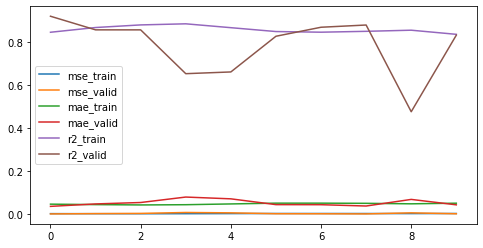

In [7]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

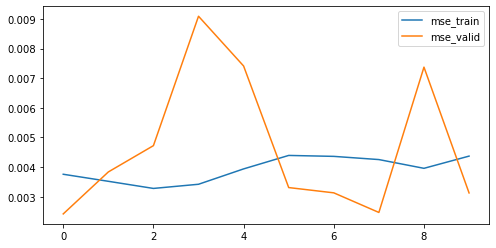

In [8]:
ax = opt_model_ori_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

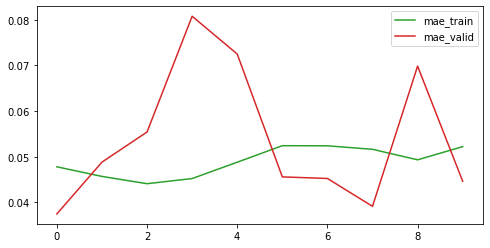

In [9]:
ax = opt_model_ori_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

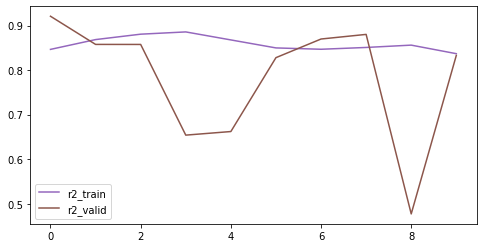

In [10]:
ax = opt_model_ori_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [11]:
opt_model_ori_test_scores = performance_test_shifted(data_set, opt_model_ori, 'tau_target_ori')
opt_model_ori_test_scores = pd.DataFrame(opt_model_ori_test_scores)
display(opt_model_ori_test_scores)
display(opt_model_ori_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.003558,0.003876,0.046165,0.049126,0.866388,0.856114,0.366445,0.391121
1,0.003533,0.004708,0.045936,0.055353,0.870761,0.857986,0.425448,0.398784
2,0.003444,0.008974,0.045415,0.080156,0.884508,0.658412,0.330819,0.389776
3,0.004058,0.007501,0.049602,0.073127,0.861981,0.657927,0.286654,0.351057
4,0.004296,0.003229,0.051747,0.044953,0.852245,0.831989,0.281294,0.271113
5,0.004216,0.003080,0.051211,0.044858,0.851132,0.871815,0.288558,0.263892
6,0.004143,0.002501,0.050809,0.039345,0.852952,0.878509,0.291026,0.287538
7,0.004003,0.007826,0.049804,0.072314,0.855362,0.444897,0.199579,0.262103
8,0.004297,0.003095,0.051685,0.044312,0.844240,0.834635,0.245124,0.232584
9,0.004203,0.003193,0.051022,0.046018,0.839289,0.846558,0.245513,0.217724


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003975,0.004798,0.049340,0.054956,0.857886,0.773884,0.296046,0.306569
std,0.000334,0.002379,0.002520,0.014680,0.013349,0.142100,0.064764,0.069394
min,0.003444,0.002501,0.045415,0.039345,0.839289,0.444897,0.199579,0.217724
25%,0.003670,0.003120,0.047024,0.044882,0.851410,0.701806,0.254458,0.262551
50%,0.004101,0.003552,0.050307,0.047572,0.854157,0.840597,0.287606,0.279325
75%,0.004213,0.006803,0.051164,0.068074,0.865286,0.857518,0.320871,0.380097
max,0.004297,0.008974,0.051747,0.080156,0.884508,0.878509,0.425448,0.398784


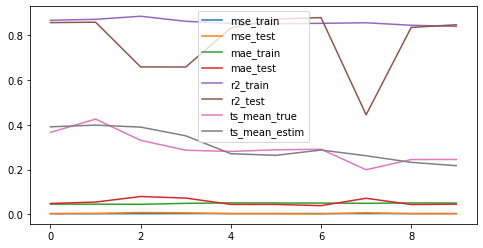

In [12]:
ax = opt_model_ori_test_scores.plot(figsize=(8,4))

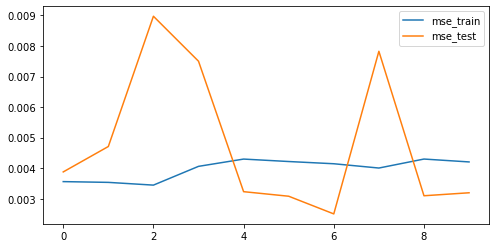

In [13]:
ax = opt_model_ori_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

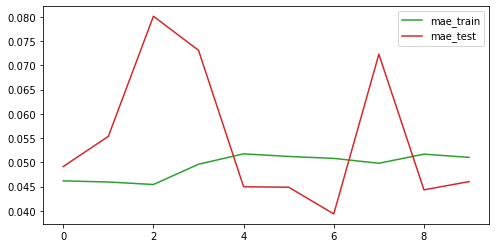

In [14]:
ax = opt_model_ori_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

(0.25, 0.9)

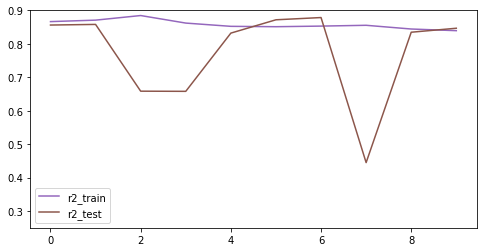

In [15]:
ax = opt_model_ori_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])
plt.ylim([0.25,0.9])

(0.2, 0.45)

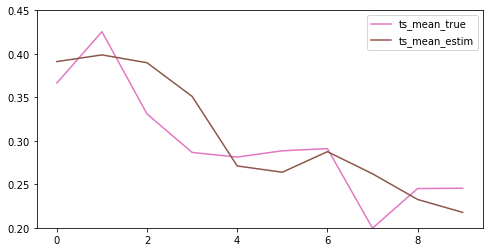

In [16]:
ax = opt_model_ori_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [17]:
results_ori = {'Model': [opt_model_ori],
            'fc_horizon': 0,
            'vif': [vif],
            'mse_tscv_t': [opt_model_ori_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_ori_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_ori_test_scores.mse_train.mean()],
            'mse_test': [opt_model_ori_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_ori_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_ori_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_ori_test_scores.mae_train.mean()],
            'mae_test': [opt_model_ori_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_ori_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_ori_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_ori_test_scores.r2_train.mean()],
            'r2_test': [opt_model_ori_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_ori.get_params()],
            'ts_mean_true': opt_model_ori_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_ori_test_scores.ts_mean_estim.mean(),
              }

## ----------------------------------------------------------
## Predicted Target Model (one year forecast horizon)
### Time Series Cross Validation on Default Model

In [18]:
opt_model_hor = ml_algorithm()
opt_model_hor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [19]:
opt_model_hor_tscv_scores = cross_validation(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_tscv_scores = pd.DataFrame(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores)
display(opt_model_hor_tscv_scores.describe())

,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
0,0.008056,0.006533,0.072361,0.061640,0.690064,0.759957
1,0.007517,0.009499,0.069205,0.077883,0.720028,0.715090
2,0.007744,0.017431,0.069768,0.110721,0.737248,0.321003
3,0.008934,0.013988,0.075663,0.102125,0.696161,0.350595
4,0.009438,0.009479,0.078386,0.079950,0.673151,0.503298
5,0.009448,0.006562,0.078209,0.066073,0.664615,0.722229
6,0.009173,0.005850,0.077179,0.061591,0.674069,0.706034
7,0.008265,0.013431,0.072809,0.096076,0.693546,0.028844
8,0.008196,0.005693,0.071928,0.060594,0.689364,0.694369
9,0.007779,0.005305,0.069308,0.058273,0.690475,0.742862


,mse_train,mse_valid,mae_train,mae_valid,r2_train,r2_valid
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008455,0.009377,0.073482,0.077493,0.692872,0.554428
std,0.000730,0.004232,0.003628,0.019298,0.021819,0.247021
min,0.007517,0.005305,0.069205,0.058273,0.664615,0.028844
25%,0.007849,0.006021,0.070308,0.061604,0.677893,0.388771
50%,0.008230,0.008020,0.072585,0.071978,0.690269,0.700201
75%,0.009113,0.012448,0.076800,0.092044,0.695507,0.720444
max,0.009448,0.017431,0.078386,0.110721,0.737248,0.759957


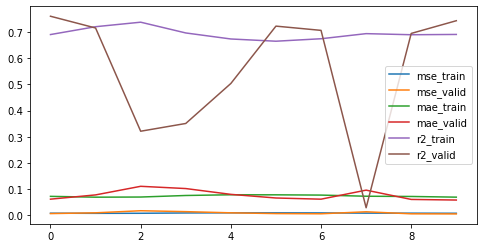

In [20]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid', 'mae_train', 'mae_valid', 'r2_train', 'r2_valid']].plot(figsize=(8,4))

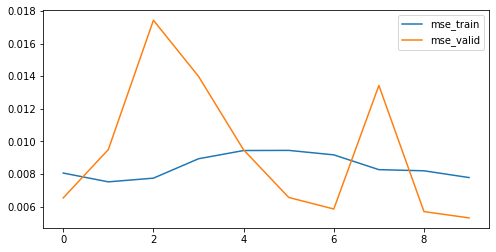

In [21]:
ax = opt_model_hor_tscv_scores[['mse_train', 'mse_valid']].plot(figsize=(8,4))

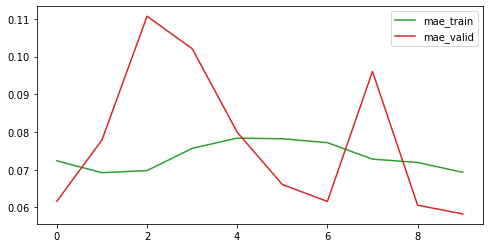

In [22]:
ax = opt_model_hor_tscv_scores[['mae_train', 'mae_valid']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

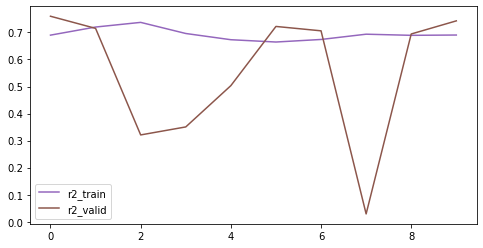

In [23]:
ax = opt_model_hor_tscv_scores[['r2_train', 'r2_valid']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

### Hyperparameter Optimization with Time Series Cross Validation
_model does not require hyperparameter tuning -> model is edtimated from training sample only to enhance comparability among all used machine learning techniques_

### Model Performance on Test Set

In [24]:
opt_model_hor_test_scores = performance_test_shifted(data_set, opt_model_hor, 'tau_target_hor')
opt_model_hor_test_scores = pd.DataFrame(opt_model_hor_test_scores)
display(opt_model_hor_test_scores)
display(opt_model_hor_test_scores.describe())

,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
0,0.007816,0.009641,0.070826,0.078759,0.706990,0.710831,0.429797,0.393706
1,0.007735,0.017313,0.069925,0.110258,0.736468,0.325620,0.335499,0.422775
2,0.008727,0.014061,0.074850,0.102468,0.698295,0.347218,0.293080,0.389038
3,0.009327,0.009441,0.078006,0.079635,0.674492,0.505308,0.287144,0.351454
4,0.009316,0.006292,0.077681,0.064687,0.666728,0.733637,0.295090,0.288021
5,0.008991,0.005878,0.076331,0.061612,0.677221,0.704618,0.292463,0.283263
6,0.008664,0.015134,0.074861,0.102481,0.682405,-0.094256,0.205042,0.300293
7,0.008736,0.005941,0.074764,0.061865,0.677180,0.681097,0.247086,0.256982
8,0.007858,0.005208,0.070334,0.057338,0.695364,0.747560,0.248710,0.237272
9,0.007464,0.020186,0.067955,0.124313,0.698895,-0.082092,0.342639,0.225611


,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,ts_mean_true,ts_mean_estim
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.008463,0.010909,0.073553,0.084342,0.691404,0.457954,0.297655,0.314842
std,0.000687,0.005400,0.003524,0.023846,0.020473,0.327119,0.062015,0.069897
min,0.007464,0.005208,0.067955,0.057338,0.666728,-0.094256,0.205042,0.225611
25%,0.007826,0.006029,0.070457,0.062571,0.677190,0.331019,0.258318,0.263552
50%,0.008695,0.009541,0.074807,0.079197,0.688884,0.593203,0.292772,0.294157
75%,0.008927,0.014866,0.075964,0.102478,0.698745,0.709278,0.325397,0.379642
max,0.009327,0.020186,0.078006,0.124313,0.736468,0.747560,0.429797,0.422775


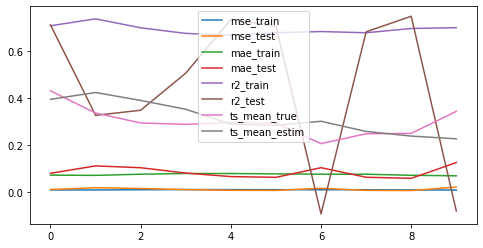

In [25]:
ax = opt_model_hor_test_scores.plot(figsize=(8,4))

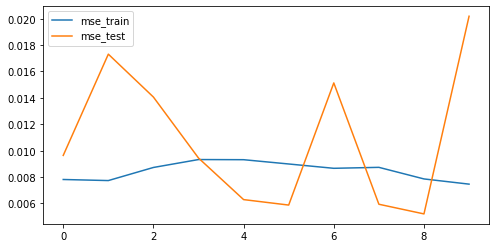

In [26]:
ax = opt_model_hor_test_scores[['mse_train', 'mse_test']].plot(figsize=(8,4))

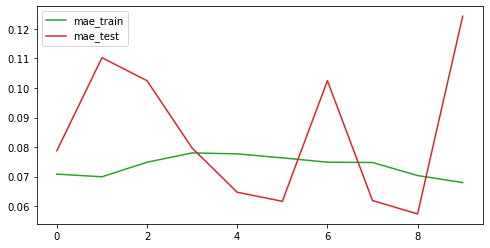

In [27]:
ax = opt_model_hor_test_scores[['mae_train', 'mae_test']].plot(figsize=(8,4), color=['#2ca02c', '#d62728'])

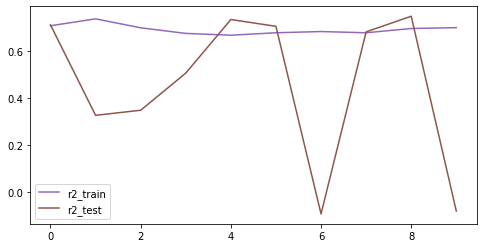

In [28]:
ax = opt_model_hor_test_scores[['r2_train', 'r2_test']].plot(figsize=(8,4), color=['#9467bd', '#8c564b'])

(0.2, 0.45)

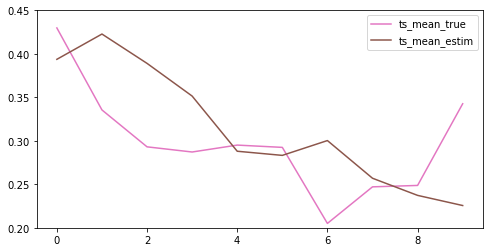

In [29]:
ax = opt_model_hor_test_scores[['ts_mean_true', 'ts_mean_estim']].plot(figsize=(8,4), color=['#e377c2', '#8c564b'])
plt.ylim([0.2,0.45])

### Data for Storage

In [30]:
results_hor = {'Model': [opt_model_ori],
            'fc_horizon': 1,
            'vif': [vif],
            'mse_tscv_t': [opt_model_hor_tscv_scores.mse_train.mean()],
            'mse_tscv_v': [opt_model_hor_tscv_scores.mse_valid.mean()],
            'mse_train': [opt_model_hor_test_scores.mse_train.mean()],
            'mse_test': [opt_model_hor_test_scores.mse_test.mean()],
               
            'mae_tscv_t': [opt_model_hor_tscv_scores.mae_train.mean()],
            'mae_tscv_v': [opt_model_hor_tscv_scores.mae_valid.mean()],
            'mae_train': [opt_model_hor_test_scores.mae_train.mean()],
            'mae_test': [opt_model_hor_test_scores.mae_test.mean()],
               
            'r2_tscv_t': [opt_model_hor_tscv_scores.r2_train.mean()],
            'r2_tscv_v': [opt_model_hor_tscv_scores.r2_valid.mean()],
            'r2_train': [opt_model_hor_test_scores.r2_train.mean()],
            'r2_test': [opt_model_hor_test_scores.r2_test.mean()],
               
            'opt_model': [opt_model_hor.get_params()],
            'ts_mean_true': opt_model_hor_test_scores.ts_mean_true.mean(),
            'ts_mean_estim': opt_model_hor_test_scores.ts_mean_estim.mean(),
              }

## Safe to Excel

In [31]:
results = pd.concat([pd.DataFrame(results_ori), pd.DataFrame(results_hor)])

display(results)

storage_name = filename + '_' + vif + '_' + str(datetime.today().day) + '.xlsx'

pd.DataFrame(results).to_excel(path + 'artifacts' + slash + storage_name, index=None)

,Model,fc_horizon,vif,mse_tscv_t,mse_tscv_v,mse_train,mse_test,mae_tscv_t,mae_tscv_v,mae_train,mae_test,r2_tscv_t,r2_tscv_v,r2_train,r2_test,opt_model,ts_mean_true,ts_mean_estim
0,LinearRegression(),0,vif_5,0.003924,0.004688,0.003975,0.004798,0.048956,0.053938,0.049340,0.054956,0.858904,0.783993,0.857886,0.773884,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.296046,0.306569
0,LinearRegression(),1,vif_5,0.008455,0.009377,0.008463,0.010909,0.073482,0.077493,0.073553,0.084342,0.692872,0.554428,0.691404,0.457954,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",0.297655,0.314842
